In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

In [3]:
import os
import sys

In [4]:
# chaging directory

In [5]:
root, *_ = !pwd

In [6]:
if root.endswith('notebooks'):
    os.chdir('../')
    root, *_ = !pwd
    sys.path.append('src/')

In [7]:
os.getcwd()

'/home/med/projects/competitions/mlb-kaggle'

In [8]:
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
RAW_PATH = Path(os.environ['RAW_PATH'])

In [10]:
os.listdir(RAW_PATH)

['seasons.csv',
 'teams.csv',
 'example_sample_submission.csv',
 'train.csv',
 'mlb-player-digital-engagement-forecasting.zip',
 'awards.csv',
 'players.csv',
 'example_test.csv',
 'mlb']

In [11]:
train_data = pd.read_csv(RAW_PATH / 'train.csv', parse_dates=['date'])
train_data = train_data.set_index('date')

In [12]:
train_data.head()

,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
date,,,,,,,,,,,
2018-01-01,"[{""engagementMetricsDate"":""2018-01-02"",""player...",NaN,"[{""playerId"":400121,""gameDate"":""2018-01-01"",""t...",NaN,NaN,"[{""transactionId"":340732,""playerId"":547348,""pl...",NaN,NaN,NaN,"[{""date"":""2018-01-01"",""playerId"":545361,""playe...","[{""date"":""2018-01-01"",""teamId"":147,""teamName"":..."
2018-01-02,"[{""engagementMetricsDate"":""2018-01-03"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-02"",""t...",NaN,NaN,"[{""transactionId"":339458,""playerId"":621173,""pl...",NaN,NaN,NaN,NaN,NaN
2018-01-03,"[{""engagementMetricsDate"":""2018-01-04"",""player...",NaN,"[{""playerId"":425492,""gameDate"":""2018-01-03"",""t...",NaN,NaN,"[{""transactionId"":347527,""playerId"":572389,""pl...",NaN,NaN,NaN,NaN,NaN
2018-01-04,"[{""engagementMetricsDate"":""2018-01-05"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-04"",""t...",NaN,NaN,"[{""transactionId"":339549,""playerId"":545343,""pl...",NaN,NaN,NaN,NaN,NaN
2018-01-05,"[{""engagementMetricsDate"":""2018-01-06"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-05"",""t...",NaN,NaN,"[{""transactionId"":341195,""playerId"":628336,""pl...",NaN,NaN,NaN,NaN,NaN


### time and player data 

In [13]:
_players = pd.read_csv(RAW_PATH / 'players.csv')

In [14]:
_players['playerForTestSetAndFuturePreds'].fillna(False, inplace=True)

In [15]:
player_in_test = _players.query('playerForTestSetAndFuturePreds')['playerId']

### target 

In [16]:
from data.ingest_data import ingest_target, ingest_features
from data.util import filter_by_date, filter_by_id

In [17]:
%time target = ingest_target(train_data)

preprocessing target
CPU times: user 28.8 s, sys: 737 ms, total: 29.6 s
Wall time: 29.5 s


In [18]:
target.head()

,playerId,target1,target2,target3,target4,date,target_avg
0,112526,0.055277,5.496109,0.025839,16.176471,2018-01-01,5.438424
1,112526,0.060625,3.252914,0.030486,8.541353,2018-01-02,2.971345
2,112526,0.029341,1.648352,0.032613,10.490112,2018-01-03,3.050104
3,112526,0.014799,2.665894,0.087422,19.091467,2018-01-04,5.464896
4,112526,0.083916,1.161002,0.024759,6.643880,2018-01-05,1.978389


In [19]:
df = target.copy()

In [20]:
df = filter_by_id(df, player_in_test)

In [21]:
playerList = df.groupby(['playerId'])['target_avg'].std().sort_values(ascending=False).reset_index()

In [22]:
playerList

,playerId,target_avg
0,547180,18.775985
1,660271,18.055585
2,545361,17.410036
3,605141,17.236386
4,592450,16.850044
...,...,...
1182,593590,0.119988
1183,656458,0.115664
1184,676424,0.094298
1185,641927,0.086976


In [23]:
# df = filter_by_id(df, playerList['playerId'].head(50))

In [24]:
df.playerId.nunique()

1187

In [25]:
# player stats

In [26]:
train_data.columns

Index(['nextDayPlayerEngagement', 'games', 'rosters', 'playerBoxScores',
       'teamBoxScores', 'transactions', 'standings', 'awards', 'events',
       'playerTwitterFollowers', 'teamTwitterFollowers'],
      dtype='object')

In [27]:
df = ingest_features(df, train_data)

In [28]:
df.head()

,playerId,target1,target2,target3,target4,date,target_avg,battingOrder,gamesPlayedBatting,flyOuts,...,assists,putOuts,errors,chances,rosterDate,teamId,status,numberOfFollowers,awardId,teamFollowers
0,405395,0.151872,21.449416,0.112952,22.990196,2018-01-01,11.176109,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-01,108.0,Active,196335.0,NaN,957451.0
1,405395,0.136406,10.978585,0.096403,15.669173,2018-01-02,6.720142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-02,108.0,Active,NaN,NaN,NaN
2,405395,0.064460,9.226190,0.101464,23.172829,2018-01-03,8.141236,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-03,108.0,Active,NaN,NaN,NaN
3,405395,0.024217,10.170965,0.102448,35.359116,2018-01-04,11.414186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-04,108.0,Active,NaN,NaN,NaN
4,405395,0.157556,4.294307,0.046517,12.347789,2018-01-05,4.211542,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-05,108.0,Active,NaN,NaN,NaN


In [29]:
import gc
del train_data, target
gc.collect()

126

### preprocessing 

In [30]:
from typing import List
def forward_fill(df: pd.DataFrame, features: List[str],
                 on='playerId',
                 limit: int =None):
    ffilled_df = df.groupby(on)[features].ffill(limit=limit)
    df.loc[:, features] = ffilled_df
    return df

In [31]:
def gen_hardcoded_features(df: pd.DataFrame):
    # some feature eng for the dates
    df['playerAge'] = (df['date'] - df['DOB']).dt.total_seconds()
    df['playerTSinceDebut'] = (df['date'] - df['mlbDebutDate']).dt.total_seconds()
    df['playerDebutAge'] = (df['mlbDebutDate'] - df['DOB']).dt.total_seconds()
    df['rostersTime'] = (df['date'] - pd.to_datetime(df['rosterDate'])).dt.total_seconds()
    df['rostersTime'] /= 60 * 60 * 24
    # normalize
    df[['playerAge', 'playerTSinceDebut', 'playerDebutAge']] /= 60 * 60 * 24 * 365
    df['AwardWinner'] = df['awardId'].isna().astype(np.float32)
    return df

In [32]:
def fillna(df: pd.DataFrame, fill_value=-1):
    return df.fillna(-1)

In [33]:
from pipeline.core import FunctionTransformer, Pipeline, PdColumnTransformer, PdFeatureUnion
from pipeline.continuous import PdScaleNorm, FilterContinuousFeatures, MedianFillNaN
from pipeline.stats import StatisticGen, LagGen, FeaturesTable
from pipeline.categories import Categorify
from pipeline.season import join_season_info
from pipeline.players import join_players_info

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class StatsEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, on: List[str],
                 stats: List[str] = ['mean'],
                dt_col: str = 'date'):
        self.on = on
        self.stats = stats
        self.dt_col = dt_col
    
    def fit(self, X: pd.DataFrame, y=None):    
        features = X.columns.drop(self.on + [self.dt_col])
        daily_features = X.groupby(self.on + [self.dt_col])[features].mean()
        
        daily_features.reset_index(inplace=True)
        daily_features.set_index(self.dt_col, inplace=True)
        
        
        stats_table = (daily_features.groupby(self.on)[features].expanding()
                      .agg(self.stats))
        stats_table.columns = ['__'.join(list(f) + ['enc'] + self.on)
                               for f in stats_table]
        
        stats_table.reset_index(inplace=True)
        self.stats_table = stats_table
        self.max_date = X[self.dt_col].max().to_numpy()

        return self


    def transform(self, X: pd.DataFrame):
        outputX = X.loc[:, self.on + [self.dt_col]].copy()
        outputX.loc[:, self.dt_col] = np.minimum(outputX[self.dt_col], self.max_date)
        
        outputX = outputX.merge(self.stats_table,
                                how='left',
                                on=self.on + [self.dt_col])

        assert len(outputX) == len(X)
#         print((X.loc[:, self.on + [self.dt_col]] == outputX.loc[:, self.on + [self.dt_col]]).all())
#         assert (X.loc[:, self.dt_col] == outputX.loc[:, self.dt_col]).all()  
        outputX.drop(self.on + [self.dt_col], axis=1, inplace=True)
        
        return outputX


In [35]:
# transformer for joining data and create base features
fill_forward_tmf = FunctionTransformer(forward_fill, kw_args={'features':['numberOfFollowers',
                                                                        'teamFollowers',
                                                                        'status',
                                                                        'teamId', 'rosterDate']})
join_season_tmf = FunctionTransformer(join_season_info,
                                      kw_args={'path_to_season': RAW_PATH / 'seasons.csv',
                                             'date_attr': ['year', 'month']})
join_players_tmf = FunctionTransformer(join_players_info, kw_args={'path_to_players': RAW_PATH / 'players.csv'})
harcoded_feat_tmf = FunctionTransformer(gen_hardcoded_features)

In [36]:
# creating pipeline
join_and_compute_feat_pl = Pipeline([('season', join_season_tmf),
                                     ('players', join_players_tmf),
                                     ('fill_forward', fill_forward_tmf),
                                     ('hardcoded_feat', harcoded_feat_tmf)])

In [37]:
# features to use for target preprocessing
target_cols = ['target1', 'target2', 'target3', 'target4']
index_cols = ['date', 'playerId']
pp_cols = target_cols + index_cols

In [38]:
# categories encoding
categories = ['playerId', 'seasonPart', 'year',
              'primaryPositionName', 'month', 'status', 'teamId', 'awardId']

categories_tmf = PdColumnTransformer([(category, Categorify(add_nan=True), category)
                                       for category in categories])

In [90]:
# mean, median, std categories encoding
stats_enc_categories = [ ['playerId', 'seasonPart'],
                         ['teamId', 'seasonPart'],
                         ['teamId']]
enc_stats = ['mean', 'std', 'median']

stats_enc_tmf = PdColumnTransformer([('_'.join(stats_enc_cat),
                                              StatsEncoding(on=stats_enc_cat, stats=enc_stats),
                                              stats_enc_cat + ['date'] + target_cols)
                                              for stats_enc_cat in stats_enc_categories])

stats_enc_pipeline = Pipeline([('compute_stats', stats_enc_tmf),
                               ('fillnan', FunctionTransformer(fillna))])

In [91]:
### compute stats
stats_gen_tmf = StatisticGen(stats=['mean', 'median', 'std'], windows=[90], drop_index=False)
target_stats_tmf = PdColumnTransformer([('gen_stats', stats_gen_tmf, pp_cols)])

target_stats_table = target_stats_tmf.fit_transform(df)


In [92]:
target_stats_table.head()

,playerId,date,target1__mean__90d,target1__median__90d,target1__std__90d,target2__mean__90d,target2__median__90d,target2__std__90d,target3__mean__90d,target3__median__90d,target3__std__90d,target4__mean__90d,target4__median__90d,target4__std__90d
0,405395,2018-01-01,0.151872,0.151872,NaN,21.449417,21.449417,NaN,0.112952,0.112952,NaN,22.990196,22.990196,NaN
1,405395,2018-01-02,0.144139,0.144139,0.010936,16.214001,16.214001,7.403996,0.104677,0.104677,0.011702,19.329685,19.329685,5.176745
2,405395,2018-01-03,0.117580,0.136406,0.046648,13.884731,10.978585,6.609545,0.103606,0.101464,0.008480,20.610733,22.990196,4.280490
3,405395,2018-01-04,0.094239,0.100433,0.060248,12.956289,10.574776,5.707194,0.103317,0.101956,0.006948,24.297829,23.081512,8.160501
4,405395,2018-01-05,0.106902,0.136406,0.059365,11.223893,10.170965,6.279732,0.091957,0.101464,0.026104,21.907820,22.990196,8.860362


In [93]:
## merge computed statistics
stats_feat_tmf = Pipeline([('lag_stats', FeaturesTable(target_stats_table, lags=[60], clip_max=True)),
                                                        ('fillnan', FunctionTransformer(fillna)),
                             ('normalize', PdScaleNorm())
                          ])

In [94]:
# continuous preprocessing

median_fillnan_columns = ['numberOfFollowers', 'teamFollowers',
                          'playerDebutAge', 'playerAge', 'playerTSinceDebut']
fillnan_median_tmf = MedianFillNaN(median_fillnan_columns)

# get the rest of the continuous features
continuous_feat_tmf = Pipeline([('get_cont_feat', FilterContinuousFeatures()),
                                ('fillnan_median', fillnan_median_tmf),
                                ('fillnan', FunctionTransformer(fillna)),
                                ('normalize', PdScaleNorm())
                               ])

In [95]:
# putting all together
all_features_tmf = PdFeatureUnion([('target_stats', stats_feat_tmf), 
                                   ('cont_feat', continuous_feat_tmf), 
                                  ('cats', categories_tmf),
                              #     ('cat_enc', stats_enc_pipeline),
                                  ])

In [96]:
# main pipeline with all steps 
pipeline = Pipeline([('join_compute', join_and_compute_feat_pl),
                    ('features_gen', all_features_tmf)])

In [97]:
pipeline

Pipeline(steps=[('join_compute',
                 Pipeline(steps=[('season',
                                  FunctionTransformer(func=<function join_season_info at 0x7f6d4868e280>,
                                                      kw_args={'date_attr': ['year',
                                                                             'month'],
                                                               'path_to_season': PosixPath('data/raw/seasons.csv')})),
                                 ('players',
                                  FunctionTransformer(func=<function join_players_info at 0x7f6d4868e3a0>,
                                                      kw_args={'path_to_players': PosixPath('data/raw/playe...
                                                                                     ('seasonPart',
                                                                                      Categorify(add_nan=True),
                                                   

In [98]:
from data.split import SplitData

In [99]:
sp = SplitData("2021-03-01", test_days=61)

In [100]:
train_idx = sp.train_idx(df)
valid_idx = sp.valid_idx(df)

In [101]:
%%time
pipeline.fit(sp.filter(df, train_idx))

CPU times: user 10.3 s, sys: 4.55 s, total: 14.9 s
Wall time: 15.3 s


Pipeline(steps=[('join_compute',
                 Pipeline(steps=[('season',
                                  FunctionTransformer(func=<function join_season_info at 0x7f6d4868e280>,
                                                      kw_args={'date_attr': ['year',
                                                                             'month'],
                                                               'path_to_season': PosixPath('data/raw/seasons.csv')})),
                                 ('players',
                                  FunctionTransformer(func=<function join_players_info at 0x7f6d4868e3a0>,
                                                      kw_args={'path_to_players': PosixPath('data/raw/playe...
                                                                                     ('seasonPart',
                                                                                      Categorify(add_nan=True),
                                                   

In [102]:
%%time
features = pipeline.transform(df)

CPU times: user 10.6 s, sys: 5.52 s, total: 16.1 s
Wall time: 16.5 s


In [103]:
pd.options.display.max_rows = 100
features.T.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1443382,1443383,1443384,1443385,1443386,1443387,1443388,1443389,1443390,1443391
target1__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.010039
target1__median__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901
target1__std__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.015834
target2__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034109,0.034958,0.035451,0.036231,0.037068,0.037560,0.038146,0.038372,0.039265,0.043983
target2__median__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016995,0.017435,0.018050,0.019155,0.019931,0.020055,0.020147,0.020199,0.020360,0.020619
target2__std__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142368,0.142652,0.142614,0.142790,0.143131,0.143067,0.143045,0.142944,0.143191,0.162586
target3__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011419,0.011553,0.011627,0.011647,0.011654,0.011662,0.011668,0.011678,0.011679,0.012058
target3__median__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901
target3__std__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.031189,0.031322,0.031348,0.031345,0.031343,0.031340,0.031338,0.031335,0.031335,0.032552
target4__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024905,0.024900,0.024930,0.024809,0.024600,0.024678,0.024702,0.024691,0.024689,0.024862


In [104]:
continuous_feat = features.columns.drop(categories)

In [105]:
df[target_cols] = df[target_cols].astype(np.float32)

In [106]:
train_idx.shape

(1443392,)

In [107]:
train_idx.shape

(1443392,)

In [108]:
train_data = sp.filter(features, train_idx)

In [109]:
raw_train_df = sp.filter(df, train_idx)

In [110]:
valid_data = sp.filter(features, valid_idx)
raw_valid_df = sp.filter(df, valid_idx)

In [111]:
train_data.shape, raw_valid_df.shape

((1370985, 102), (72407, 86))

In [112]:
valid_data.shape, raw_train_df.shape

((72407, 102), (1370985, 86))

In [113]:
train_data[target_cols + ['date']] = raw_train_df[target_cols + ['date']]
valid_data[target_cols + ['date']] = raw_valid_df[target_cols + ['date']]

### modeling 

In [114]:
features_list = list(continuous_feat) + categories

In [115]:
features_list

['target1__mean__90d__60lag',
 'target1__median__90d__60lag',
 'target1__std__90d__60lag',
 'target2__mean__90d__60lag',
 'target2__median__90d__60lag',
 'target2__std__90d__60lag',
 'target3__mean__90d__60lag',
 'target3__median__90d__60lag',
 'target3__std__90d__60lag',
 'target4__mean__90d__60lag',
 'target4__median__90d__60lag',
 'target4__std__90d__60lag',
 'battingOrder',
 'gamesPlayedBatting',
 'flyOuts',
 'groundOuts',
 'runsScored',
 'doubles',
 'triples',
 'homeRuns',
 'strikeOuts',
 'baseOnBalls',
 'intentionalWalks',
 'hits',
 'hitByPitch',
 'atBats',
 'caughtStealing',
 'stolenBases',
 'groundIntoDoublePlay',
 'groundIntoTriplePlay',
 'plateAppearances',
 'totalBases',
 'rbi',
 'leftOnBase',
 'sacBunts',
 'sacFlies',
 'catchersInterference',
 'pickoffs',
 'gamesPlayedPitching',
 'gamesStartedPitching',
 'completeGamesPitching',
 'shutoutsPitching',
 'winsPitching',
 'lossesPitching',
 'flyOutsPitching',
 'airOutsPitching',
 'groundOutsPitching',
 'runsPitching',
 'doublesP

In [116]:
from omegaconf import OmegaConf

parameters = {
 'objective':'mae',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1, 
 'n_estimators': 100000,
 'learning_rate': 0.1,
 'random_state': 42,
}
config = {'hp': parameters,
          'features': features_list,
          'categories': categories,
          'target_cols': target_cols}
config = OmegaConf.create(config)

In [117]:
config

{'hp': {'objective': 'mae', 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'n_estimators': 100000, 'learning_rate': 0.1, 'random_state': 42}, 'features': ['target1__mean__90d__60lag', 'target1__median__90d__60lag', 'target1__std__90d__60lag', 'target2__mean__90d__60lag', 'target2__median__90d__60lag', 'target2__std__90d__60lag', 'target3__mean__90d__60lag', 'target3__median__90d__60lag', 'target3__std__90d__60lag', 'target4__mean__90d__60lag', 'target4__median__90d__60lag', 'target4__std__90d__60lag', 'battingOrder', 'gamesPlayedBatting', 'flyOuts', 'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch', 'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay', 'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference', 'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching', 'completeGamesPitching', 'shutoutsPitching', 'winsPitching', 'losses

In [118]:
from train.lgbm import run_lgbm

In [119]:
lgbm_output = run_lgbm(config, train_data, valid_data)

target1


/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['awardId', 'month', 'playerId', 'primaryPositionName', 'seasonPart', 'status', 'teamId', 'year']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.38496
[200]	valid_0's l1: 1.38176
[300]	valid_0's l1: 1.38059
[400]	valid_0's l1: 1.37892
[500]	valid_0's l1: 1.37813
[600]	valid_0's l1: 1.377
[700]	valid_0's l1: 1.37564
[800]	valid_0's l1: 1.37549
Early stopping, best iteration is:
[766]	valid_0's l1: 1.37531
target2
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2.99339
[200]	valid_0's l1: 2.98764
Early stopping, best iteration is:
[181]	valid_0's l1: 2.9862
target3
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.23391
[200]	valid_0's l1: 1.23562
Early stopping, best iteration is:
[115]	valid_0's l1: 1.23387
target4
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.82544
[200]	valid_0's l1: 1.81523
[300]	valid_0's l1: 1.81465
[400]	valid_0's l1: 1.81078
[500]	valid_0's l1: 1.80984
Early stopping, best iteration is:
[476]	valid_0's l1: 1.80971


In [120]:
from evaluate.metrics import compute_metrics

with best 500 ids 
one day lag

{'mae_mean': 15.404842,
 'mae_1': 15.112363,
 'mae_2': 12.518346,
 'mae_3': 15.941521,
 'mae_4': 18.04714}
 
{'mae_mean': 16.107979,
 'mae_1': 14.4299965,
 'mae_2': 13.712786,
 'mae_3': 17.216927,
 'mae_4': 19.072205}
 
lag 60 day 150 stats mean median std
raw_valid_df

{'mae_mean': 16.526415,
 'mae_1': 15.134252,
 'mae_2': 15.736391,
 'mae_3': 16.731949,
 'mae_4': 18.503065}
 
{'mae_mean': 16.243195,
 'mae_1': 14.64544,
 'mae_2': 15.223519,
 'mae_3': 16.67205,
 'mae_4': 18.43177}
 
 
with best 500 ids 
one day lag 
{'mae_mean': 2.4375365,
 'mae_1': 2.2795138,
 'mae_2': 3.1164076,
 'mae_3': 1.6708878,
 'mae_4': 2.6833365}
 
{'mae_mean': 3.2938020082107333,
 'mae_1': 2.5740078375938165,
 'mae_2': 5.631358953836824,
 'mae_3': 1.837284798457624,
 'mae_4': 3.1325564429546677}
 
lag 60 day 150 stats mean median std

{'mae_mean': 2.8213322,
 'mae_1': 2.4738746,
 'mae_2': 3.9536836,
 'mae_3': 1.8413752,
 'mae_4': 3.0163958}
 
{'mae_mean': 2.8054446768310446,
 'mae_1': 2.4669433853402922,
 'mae_2': 3.901420425393473,
 'mae_3': 1.8396196560640896,
 'mae_4': 3.0137952405263246}
 
 con toda la data
 
 {'mae_mean': 1.5619345,
 'mae_1': 1.2107118,
 'mae_2': 2.4501314,
 'mae_3': 0.95569867,
 'mae_4': 1.6311963}
 
 
 {'mae_mean': 1.5390999144452775,
 'mae_1': 1.210369386168515,
 'mae_2': 2.3818660584590656,
 'mae_3': 0.9496059085908733,
 'mae_4': 1.6145583045626561}
 

no propating forward
{'mae_mean': 1.6181669660843265,
 'mae_1': 1.2681040951665854,
 'mae_2': 2.542929024032986,
 'mae_3': 0.9624048148661487,
 'mae_4': 1.699229930271586}

In [121]:
valid_test_prediction = pd.DataFrame(lgbm_output.prediction, columns=['yhat1', 'yhat2', 'yhat3', 'yhat4'])

valid_test_prediction[pp_cols] = raw_valid_df[pp_cols]

In [122]:
is_test_pred = valid_test_prediction['date'] >= '2021-04-01'

valid_prediction, test_prediction = (valid_test_prediction.loc[~is_test_pred, :],
                                     valid_test_prediction.loc[is_test_pred, :])

In [123]:
compute_metrics(valid_test_prediction)

{'mae_mean': 1.8512715527087402,
 'mae_1': 1.3753094820735003,
 'mae_2': 2.98619864056599,
 'mae_3': 1.233873057954095,
 'mae_4': 1.809705030241376}

In [124]:
compute_metrics(valid_prediction)

{'mae_mean': 2.134871722787277,
 'mae_1': 1.5176684034783396,
 'mae_2': 3.5638354807359063,
 'mae_3': 1.4992941731307434,
 'mae_4': 1.9586888338041188}

In [125]:
compute_metrics(test_prediction)

{'mae_mean': 1.558218043627586,
 'mae_1': 1.2282052632884994,
 'mae_2': 2.3893072390570773,
 'mae_3': 0.9596045722715588,
 'mae_4': 1.655755099893209}

{'mae_mean': 8.744398122453422,
 'mae_1': 8.91478917325309,
 'mae_2': 8.77152911391691,
 'mae_3': 7.268066076937021,
 'mae_4': 10.023208125706667}

{'mae_mean': 7.778629376660697,
 'mae_1': 7.032324510699994,
 'mae_2': 9.003801645329068,
 'mae_3': 6.445435023328167,
 'mae_4': 8.632956327285559}

{'mae_mean': 8.269542728999648,
 'mae_1': 7.989123162641596,
 'mae_2': 8.885384394035018,
 'mae_3': 6.863603225531401,
 'mae_4': 9.34006013379057}

In [126]:
def plot_pred(df, playerId, index=1):
    pdf = df.query(f'playerId == {playerId}')
    
    f, ax = plt.subplots(1, 1, figsize=(20, 5))
    
    tname = f'target{index}'
    yhat_name = f'yhat{index}'
    
    ax.plot('date', tname, '-o', data=pdf, label=tname)
    ax.plot('date', yhat_name, '-o', data=pdf, label=tname)
    
    ax.legend()
    

In [127]:
def feature_importance(features, model):
    fi = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    fi.sort_values(by='importance', ascending=False, inplace=True)
    return fi

def compute_fi(features, models):
    fi = [feature_importance(features, _model).assign(target=f'target{target}')
      for target, _model in enumerate(models)]
    fi = pd.concat(fi)
    fi = fi.pivot('feature', 'target', 'importance')
    fi = fi * 100 / fi.sum()
    fi['mean'] = fi.mean(axis=1)
    fi.sort_values(by='mean', ascending=False, inplace=True)
    return fi

In [128]:
fi = compute_fi(features_list, lgbm_output.model)

In [129]:
fi.head(100)

target,target0,target1,target2,target3,mean
feature,,,,,
playerId,59.508268,52.062615,67.420290,57.857143,59.212079
month,11.083551,10.423573,6.231884,12.107843,9.961713
seasonPart,8.442124,8.324125,2.608696,1.869748,5.311173
playerTSinceDebut,1.879896,4.825046,1.072464,4.950980,3.182096
rostersTime,2.467363,1.546961,3.275362,3.214286,2.625993
year,0.500435,2.983425,3.536232,2.724090,2.436046
target2__std__90d__60lag,2.436902,2.191529,0.579710,3.732493,2.235158
teamId,2.932985,2.559853,0.869565,0.462185,1.706147
target3__mean__90d__60lag,0.082681,0.055249,6.260870,0.315126,1.678481


In [130]:
# (valid_prediction.groupby('playerId')
#  .apply(lambda x: pd.Series(compute_metrics(x)))
#  .sort_values(by='mae_mean', ascending=False)).head(10)

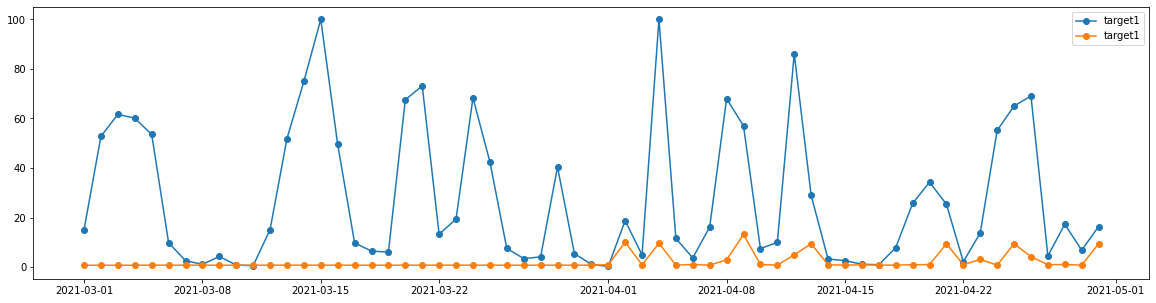

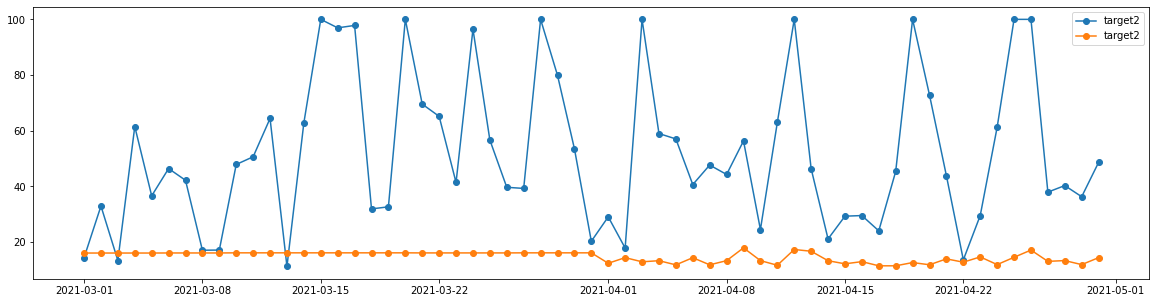

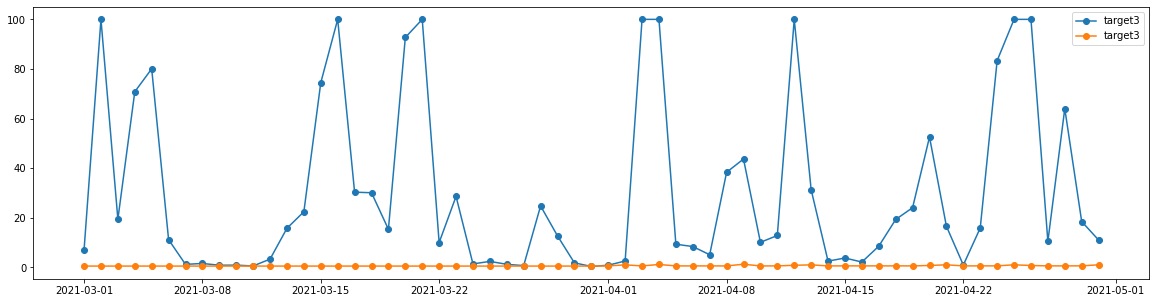

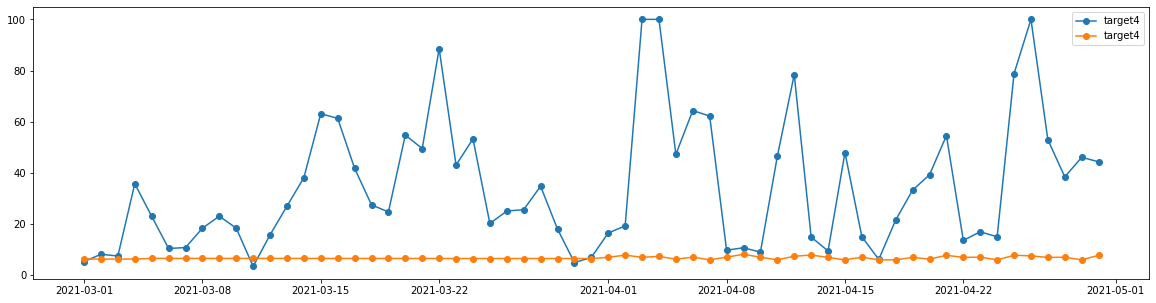

In [131]:
for index in range(1, 5):
    plot_pred(valid_test_prediction, playerId=660271, index=index)

In [81]:
# del train_data, valid_data, target, features #df, raw_train_df, raw_valid_df

In [82]:
# import gc
# gc.collect()